In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import text, create_engine
from env import get_connection

from pydataset import data

In [155]:
anscombe = sns.load_dataset('anscombe')
iris = sns.load_dataset('iris')

iris
1. What does the distribution of petal lengths look like?
# petal_length is grouped around three tight ranges. 1-2 , 3-5, and ,5-7

In [156]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

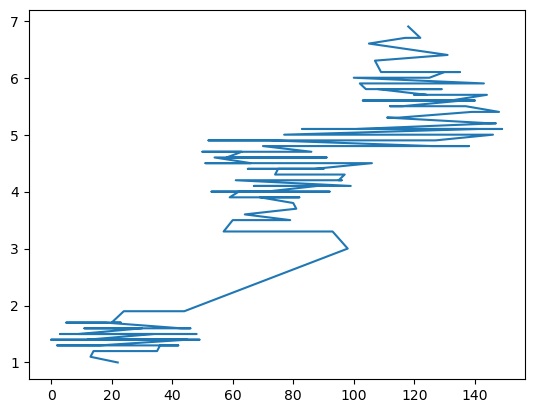

In [157]:
iris['petal_length'].sort_values().plot()

2. Is there a relationship between petal length and petal width?
# yes petal length and petal witdth are positiviy correlated

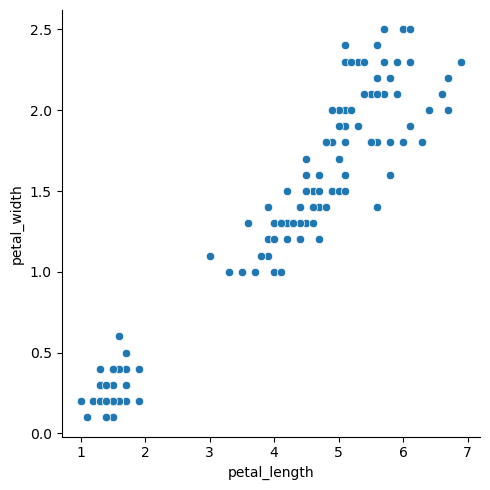

In [158]:
sns.relplot(x='petal_length', y='petal_width', data=iris)

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

# For the setosa: yes, for the veriscoloe and virgina : no

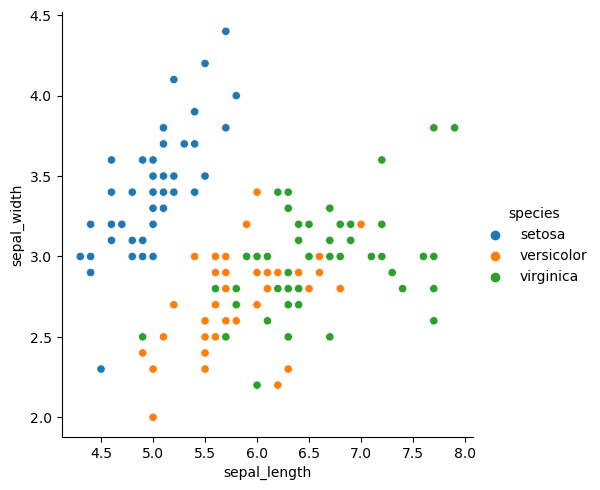

In [159]:
sns.relplot(x='sepal_length' , y= 'sepal_width', hue= 'species' , data=iris)

Iris
4. Which features would be best used to predict species?
# looks like petal length and petal width are teh best indicators


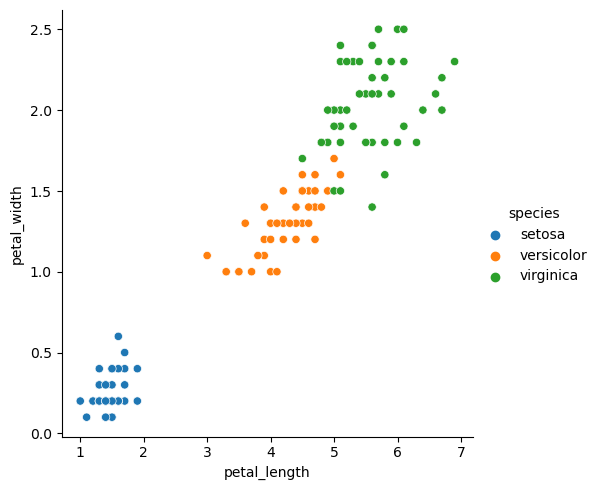

In [160]:
sns.relplot(x='petal_length', y='petal_width', hue='species',data=iris)

In [161]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


ANSCOMBE
1. Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [162]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


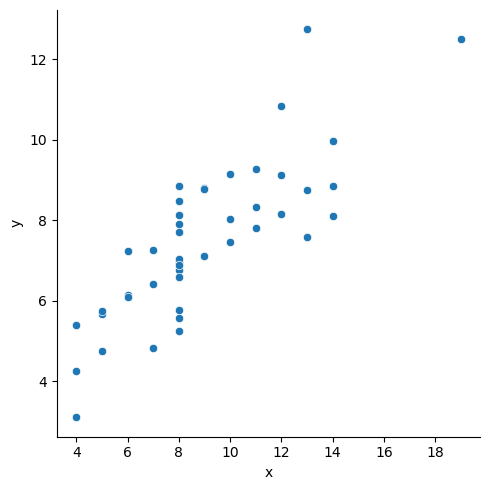

In [163]:
sns.relplot(x='x', y='y' , data=anscombe)

<Axes: xlabel='y'>

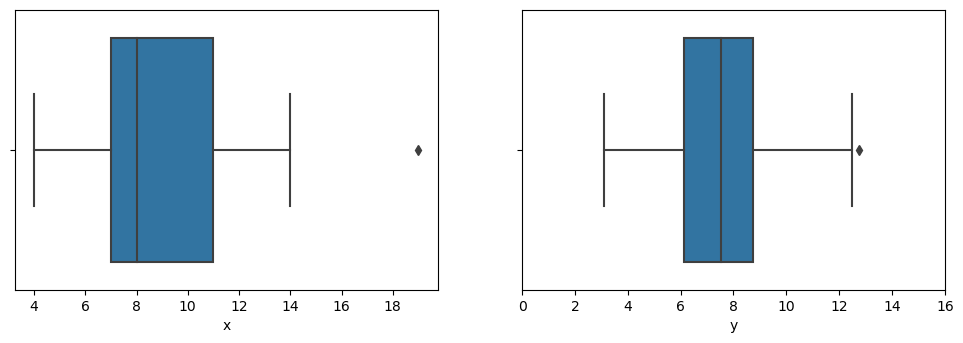

In [164]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(data=anscombe , x= 'x')
plt.subplot(2,2,2)
plt.xlim(0,16)
sns.boxplot(data=anscombe , x= 'y')





2. Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [165]:
InsectSprays = data('InsectSprays')

In [166]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

<Axes: xlabel='spray', ylabel='count'>

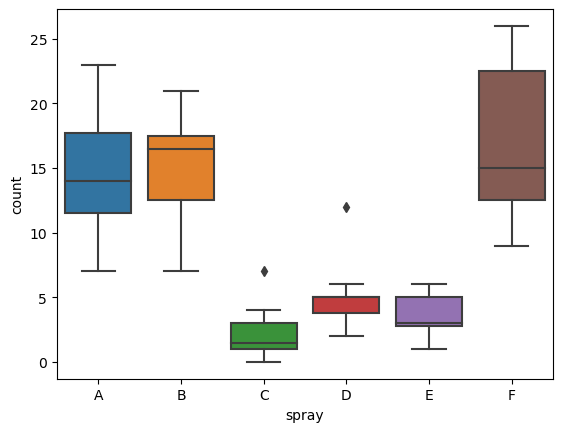

In [167]:

sns.boxplot(data=InsectSprays , y='count', x='spray')

3. Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:

Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
Does whether or not a province is Catholic influence fertility?
What measure correlates most strongly with fertility?

In [168]:
swiss = data('swiss')

In [169]:
swiss['is_catholic'] = swiss.Catholic > 50

In [170]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<Axes: xlabel='is_catholic', ylabel='Fertility'>

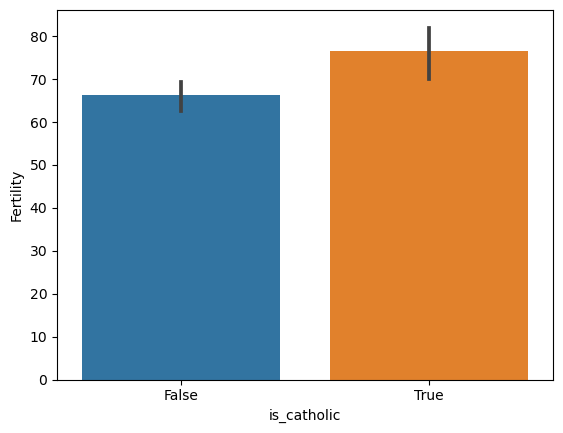

In [171]:
# It does appear that catholics are more fertile
## be fruitful and multiply
sns.barplot(data=swiss, x= 'is_catholic' , y= 'Fertility')

<Axes: xlabel='Examination', ylabel='Fertility'>

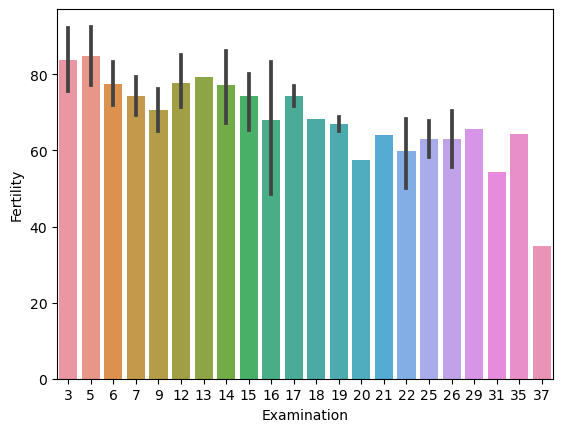

In [172]:
# The Examination Nation collum seems to be the most strongly coorelated measure

sns.barplot(data=swiss, x= 'Examination' , y= 'Fertility')

In [173]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

4. Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [174]:
url = get_connection('chipotle')

In [175]:
engine = create_engine(url)

In [181]:
query = '''

SELECT *
FROM orders
;

'''

In [182]:
text_query = text(query)

In [183]:
chipotle = pd.read_sql(text_query, engine.connect())
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [186]:
chip_x = chipotle.groupby('item_name').quantity.sum().nlargest(4)

In [ ]:
# I can't get how ot plpt form two diffetnt data sources
## Shoudl i try to combine my chart back? 

'''
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name', x = 'item_price', data = revenue)
plt.title('Most popular items and revenue')

plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Revenue from Top 4 selling Items")

'''

In [ ]:
sns.barplot(data= chipotle, )

5. Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [ ]:
sleepstudy = data('sleepstudy')

In [ ]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [ ]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

<Axes: xlabel='Days', ylabel='Reaction'>

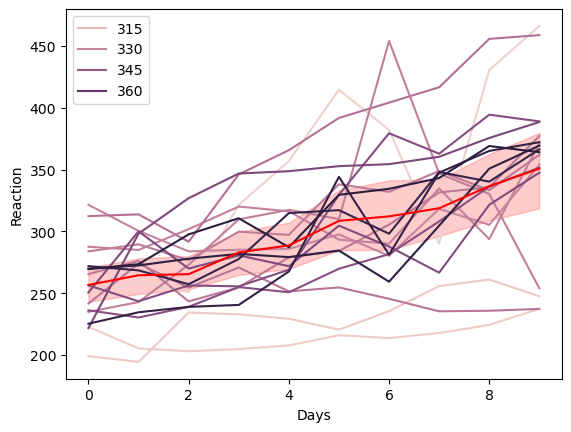

In [ ]:
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue='Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'red')